# Heart Disease - UCI

<img src="img/uci_heart_disease.png" align="center" width="60%">

# Contexto

Este banco de dados contém 76 atributos, mas todos os experimentos publicados referem-se ao uso de um subconjunto de 14 deles. Em particular, o banco de dados de Cleveland é o único que tem sido usado por pesquisadores do ML até esta data. O campo "meta" refere-se à presença de doença cardíaca no paciente. É um inteiro valorizado de 0 (sem presença) a 4.

Para acesso à página original [clique aqui](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

# Desafio 3

A ideia é a utilização dos algoritmos de _Clusterização_ e entender como eles trabalham no agrupamento dos dados. Teoricamente, o algoritmo deve classificar os dados de acordo com as variáveis explicativas, então será possível medir a precisão das classificações. Caso seja feita uma redução de dimensão, também temos a possibilidade de identificar visualmente estas separações, além de calcular uma matriz de confusão. Ainda, pode ser utilizado algoritmos que definem sozinhos os números de clusters, permitindo uma comparação com os grupos reais. A partir disso, não temos a prioridade de trabalhaar com a definição de cada variável explicativa (nome da coluna de dados), mas sim como os algoritmos de _Clusterização_ se comportam com o DataSet.

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.datasets.samples_generator import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import statsmodels.formula.api as sm
from sklearn import datasets
from sklearn import metrics


%matplotlib inline
tqdm.pandas(desc="Operation Progress")

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


In [11]:
!pip install wget

  Stored in directory: C:\Users\Muril\AppData\Local\pip\Cache\wheels\40\15\30\7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [86]:
data = pd.read_csv('heart.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [162]:
data['age'] = data['age'].astype('float64')
data['sex'] = data['sex'].astype('float64')
data['cp'] = data['cp'].astype('float64')
data['trestbps'] = data['trestbps'].astype('float64')
data['chol'] = data['chol'].astype('float64')
data['fbs'] = data['fbs'].astype('float64')
data['restecg'] = data['restecg'].astype('float64')
data['thalach'] = data['thalach'].astype('float64')
data['exang'] = data['exang'].astype('float64')
data['oldpeak'] = data['oldpeak'].astype('float64')
data['slope'] = data['slope'].astype('float64')
data['ca'] = data['ca'].astype('float64')
data['thal'] = data['thal'].astype('float64')
data['target'] = data['target'].astype('float64')

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null float64
thal        303 non-null float64
target      303 non-null float64
dtypes: float64(14)
memory usage: 33.2 KB


In [184]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


C:\Users\Muril\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Muril\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Muril\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


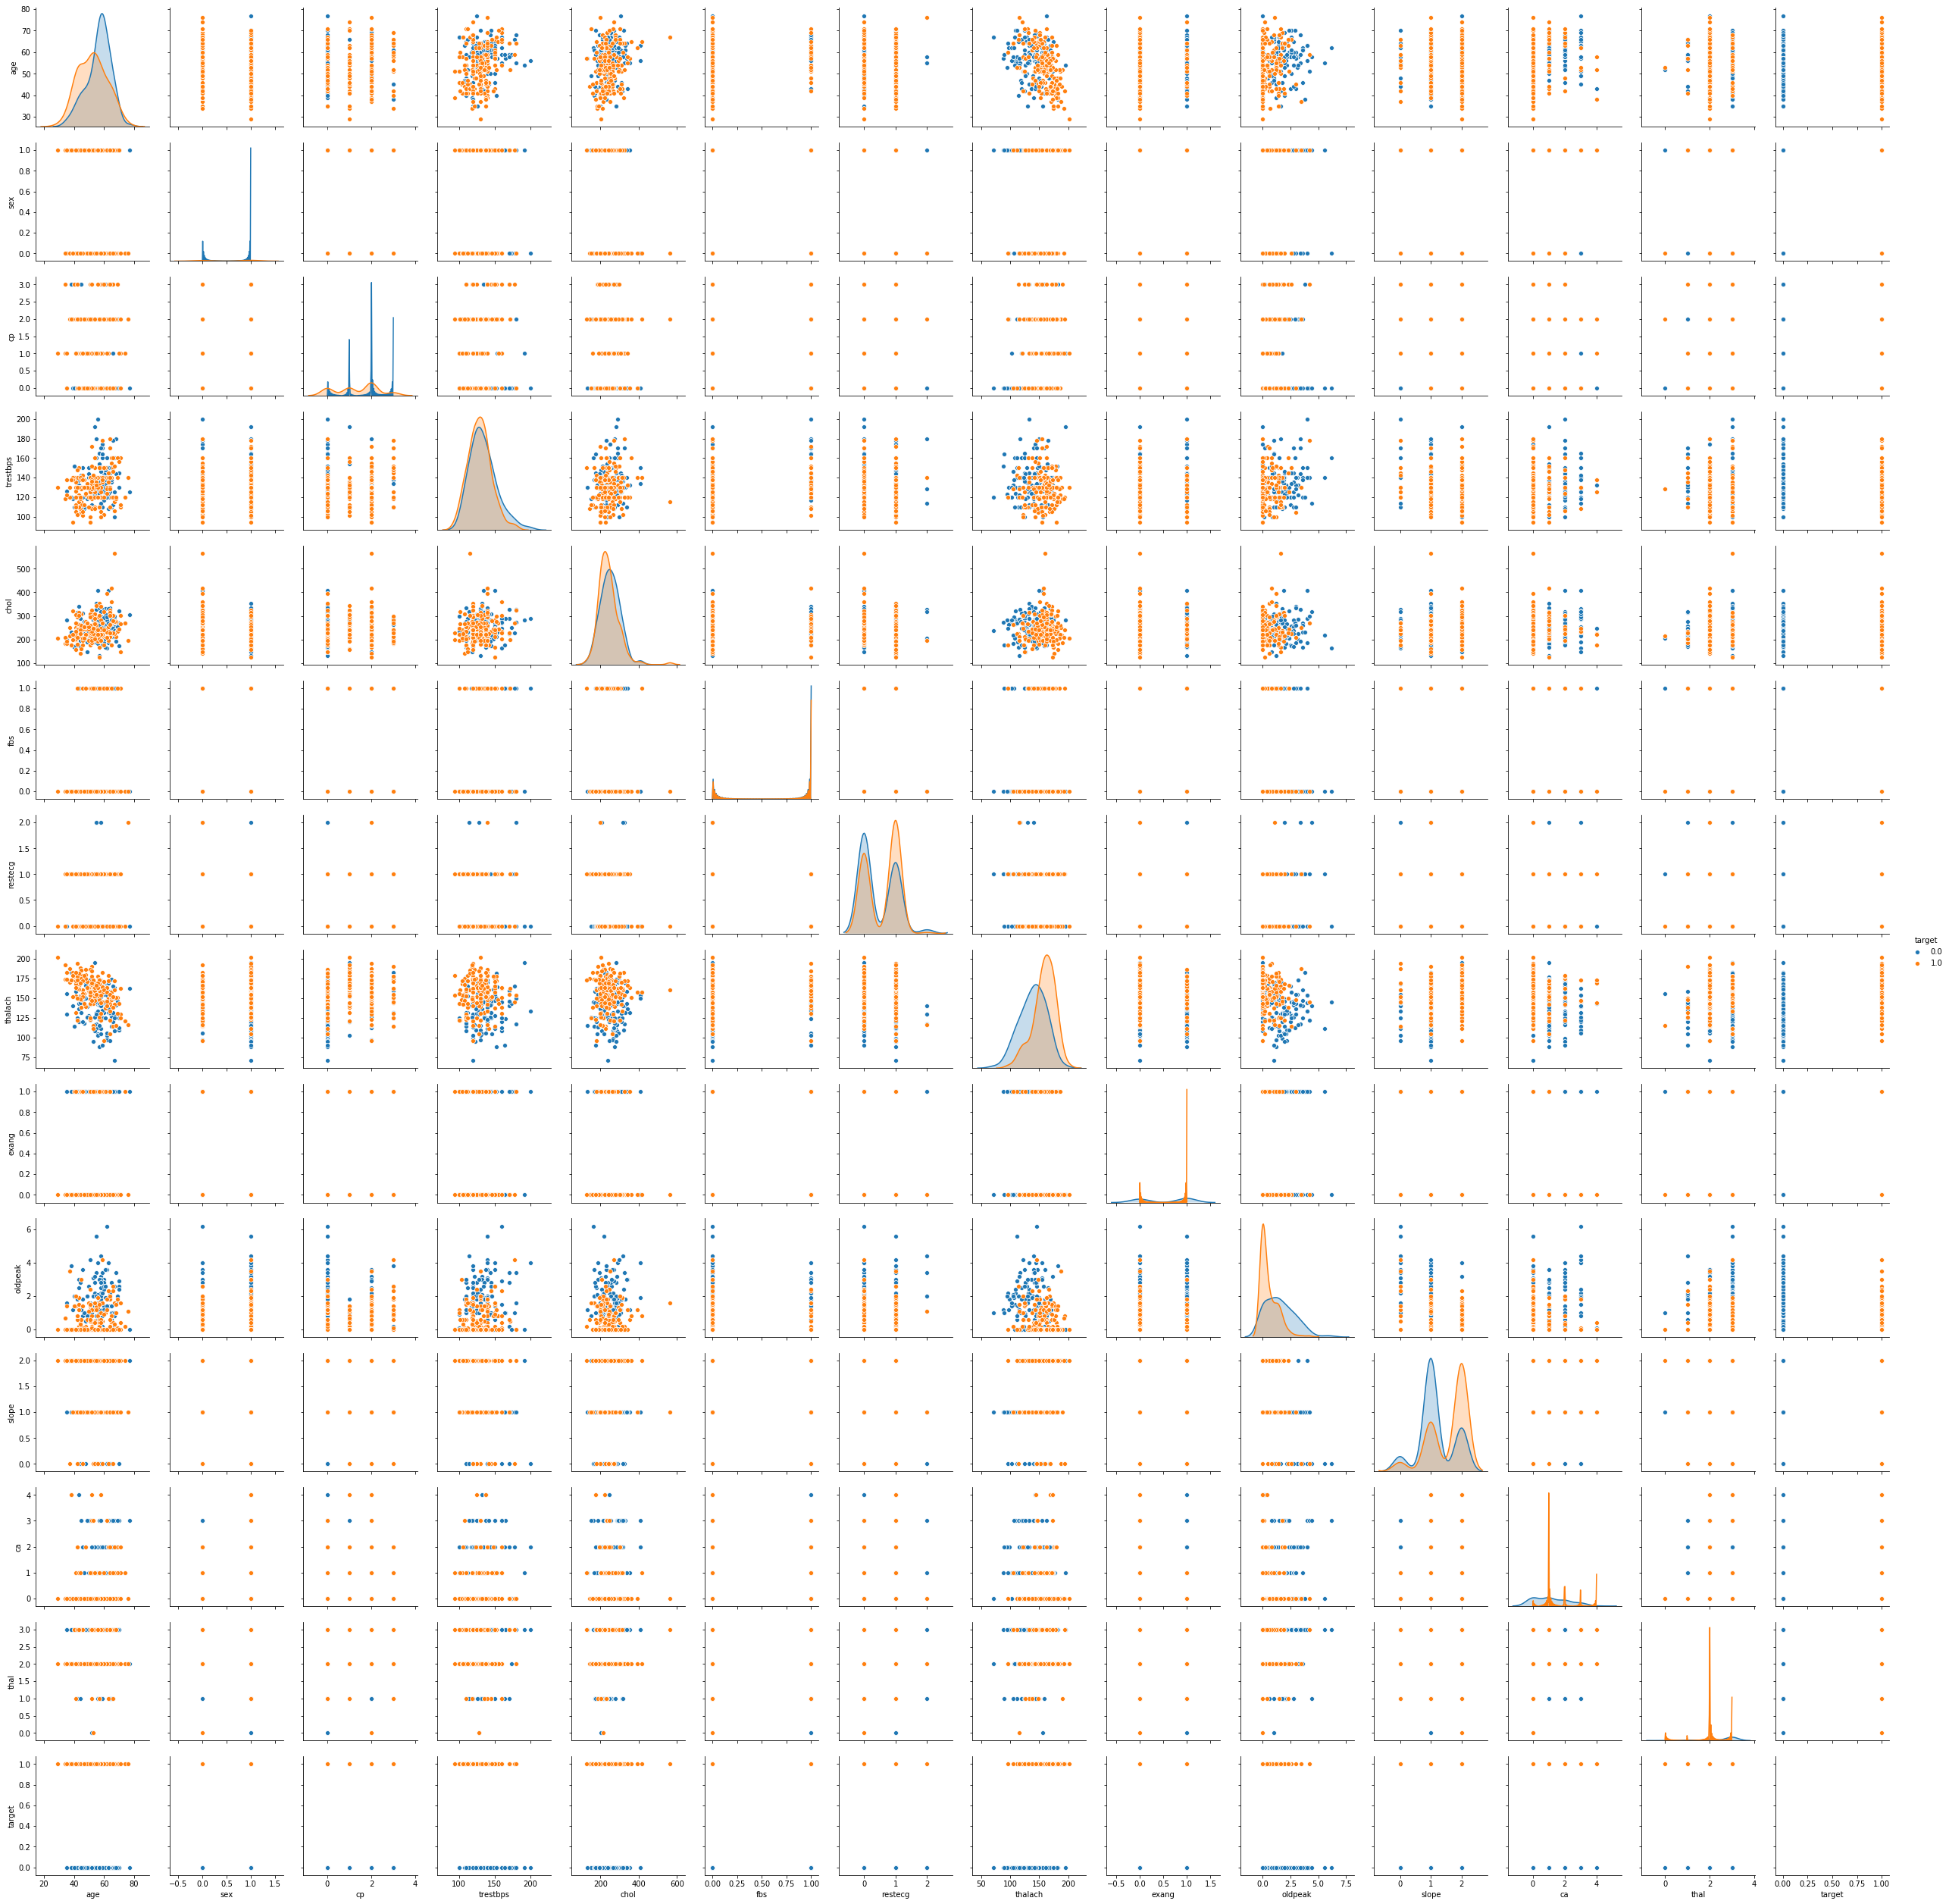

In [165]:
sns.pairplot(data,hue="target")

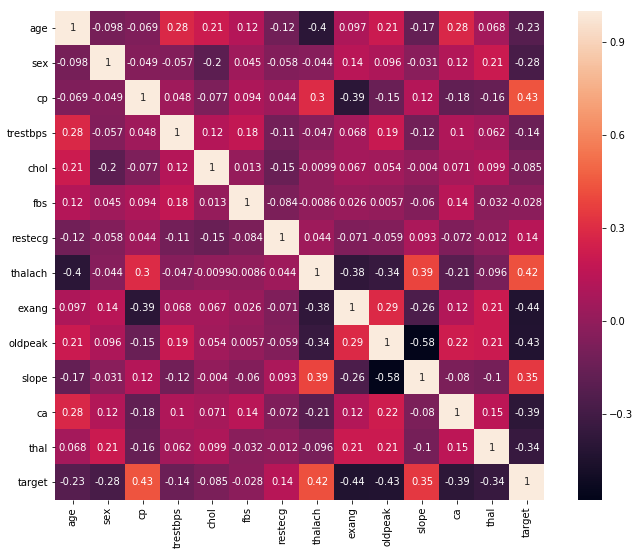

In [166]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True,square=True)

array([1., 0.])

(303, 14)

In [178]:

X=np.append(arr=np.ones((303,1)).astype(int),values=data,axis=1)

X_l=data.iloc[:,[0,1,2,3,4,5,6]].values
r=sm.OLS(endog=data.iloc[:,-1:],exog=X_l).fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     77.65
Date:                Tue, 23 Apr 2019   Prob (F-statistic):           2.75e-63
Time:                        19:45:13   Log-Likelihood:                -179.91
No. Observations:                 303   AIC:                             373.8
Df Residuals:                     296   BIC:                             399.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0024      0.003     -0.867      0.3

In [167]:
X = data.iloc[:, 1:14].values 
y = data.iloc[:, 0].values 

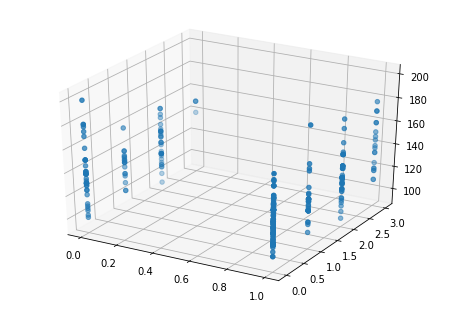

In [169]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [170]:
# Splitting the X and Y into the 
# Training set and Testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# performing preprocessing part 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [171]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (242, 13)
X_test (61, 13)
y_train (242,)
y_test (61,)


In [180]:
# Fitting Logistic Regression To the training set 
   
classifier = LogisticRegression() 
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 

cm = confusion_matrix(y_test, y_pred) 

In [181]:
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [144]:
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print()
print(pca.components_)

[0.25202446 0.10718286 0.09677047 0.09128019 0.077058   0.07294973
 0.06284109 0.05594925 0.04648548 0.04526881 0.04024733 0.02724875
 0.02469358]

[[ 0.14651332 -0.28047533  0.11911552  0.06594088  0.06331123 -0.13852619
  -0.36648055  0.35805304  0.38830783 -0.35617526  0.24865628  0.22126282
  -0.45518345]
 [-0.48104248  0.11862488  0.43937286  0.54442552  0.21308332 -0.37558507
   0.07215202 -0.10575739  0.08062257 -0.1022405   0.09383176 -0.17066153
   0.08565366]
 [ 0.42643219  0.27221003  0.36018291 -0.24626305  0.57832225 -0.0802282
   0.20793644 -0.11291056 -0.07925118  0.17770345  0.29310144  0.15538207
  -0.09428264]
 [-0.07108298  0.36719971  0.08945102 -0.37558015  0.12652445  0.23850834
  -0.15602647 -0.16579019  0.39528329 -0.49185655 -0.15343067 -0.39100909
   0.10827518]
 [ 0.16017737 -0.15457471 -0.20793794 -0.13884929  0.33225548 -0.53082792
  -0.19476655  0.29843268 -0.22241814  0.02483312 -0.30103832 -0.47265192
   0.06822077]
 [-0.29503523 -0.30218675 -0.26692816 

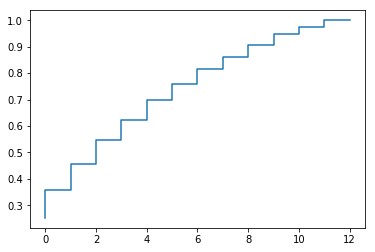

In [148]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

In [152]:
y_predict = kmeans.predict(X)
y_pred_bin = kmeans.predict(X_test)

# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

1 1064236.913531353
2 581217.3275445125
3 448214.06538667076
4 368228.6604384498
5 310502.12252649956
6 272330.6124897423
7 248873.9527811745
8 225110.1912157299
9 206542.09167307307
10 192562.02413220116


Text(0,0.5,'WSS')

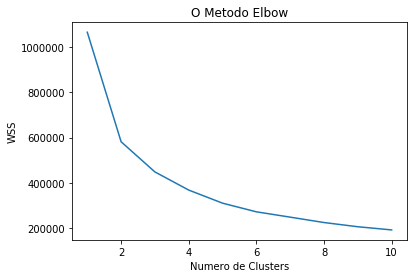

In [153]:
ml=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'random')
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    ml.append(kmeans.inertia_)  
plt.plot(range(1, 11), ml)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares

In [155]:
cm = confusion_matrix(y_test, y_pred) 
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [199]:
data.target.unique()

array([1., 0.])

In [206]:
x = data.iloc[:, 0:13].values 

In [207]:
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [208]:
X_train, X_test, y_train, y_test = train_test_split(x, data.target, test_size=0.2,random_state=42) 

In [209]:
from sklearn.linear_model import LogisticRegression   
  
classifier = LogisticRegression() 
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test) 

In [211]:
confusion_matrix(y_test, y_pred)

array([[25,  4],
       [ 4, 28]], dtype=int64)

In [212]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print ("Accuracy:",accuracy_score(y_test, y_pred))
print ("precision:",precision_score(y_test, y_pred))
print ("Recal:",recall_score(y_test, y_pred))

Accuracy: 0.8688524590163934
precision: 0.875
Recal: 0.875


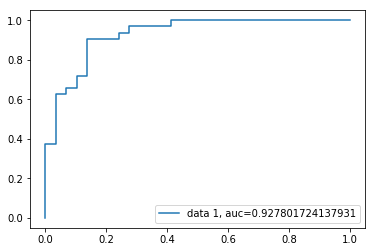

In [213]:

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)

In [214]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]
    
best_classifier = 0
record_accuracy = 0

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    y_pred = clf.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))

KNeighborsClassifier
****Results****
Accuracy: 0.6557377049180327
Precision: 0.6896551724137931
Recall: 0.625
GaussianNB
****Results****
Accuracy: 0.8688524590163934
Precision: 0.9
Recall: 0.84375
LogisticRegression
****Results****
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
SVC
****Results****
Accuracy: 0.5409836065573771
Precision: 0.5333333333333333
Recall: 1.0
DecisionTreeClassifier
****Results****
Accuracy: 0.8360655737704918
Precision: 0.8928571428571429
Recall: 0.78125
RandomForestClassifier
****Results****
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
GradientBoostingClassifier
****Results****
Accuracy: 0.7704918032786885
Precision: 0.8
Recall: 0.75
